## Transfer Learning using CIFAR-10 data
You will work with the CIFAR-10 Dataset. This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are: 
airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

To illustrate the power and concept of transfer learning, you will train a CNN on just the classes (airplane, automobile, bird, cat, deer). Then you will train just the last layer(s) of the network on the classes (dog, frog, horse, ship, truck) and see how well the features learned on (airplane, automobile, bird, cat, deer) help with classifying (dog, frog, horse, ship, truck).


In [42]:
from __future__ import print_function
import tensorflow as tf
import datetime 
import numpy as np

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K




In [43]:
#used to help some of the timing functions


In [44]:
## This just handles some variability in how the input data is loaded
img_rows, img_cols = 32, 32
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)

In [45]:
## To simplify things, write a function to include all the training steps
## As input, function takes a model, training set, test set, and the number of classes
## Inside the model object will be the state about which layers we are freezing and which we are training
from keras.utils import np_utils
def train_model(model, train, test, num_classes,batch_size,epochs):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = tf.keras.utils.to_categorical(train[1], num_classes)
    y_test = tf.keras.utils.to_categorical(test[1], num_classes)
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    t = datetime.datetime.now()
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
  
    print('Training time: %s' % (datetime.datetime.now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    import matplotlib.pyplot as plt
    

    # Print accuracy and loss function
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

    







In [46]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

# create two datasets: one with classes below 5 and one with 5 and above
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5





## Assignment
### PART-1: Build your CNN model
PART-1: Build your own model
Build a CNN model with the following specifications:

1. Two convolutional layers with ReLU activations.
2. MaxPooling with stride 2. Dropout of 0.25 after MaxPooling.
3. Two hidden fully-connected layers, two dropouts of 0.25 and a final output layer for classification.
4. Train this model for 10 epochs with RMSProp at a learning rate of .001 and a batch size of 64.
5. Evaluate the test results.




In [47]:
# Our model
num_classes=5
model=Sequential()
model.add(Conv2D(32, 3, padding='same',activation="relu",
                 input_shape=x_train_gte5.shape[1:]))

model.add(Conv2D(32, 3,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dropout(0.25))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(num_classes,activation="Softmax"))





In [48]:
# Take a look at layers and total number of trainable parameters
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               921728    
                                                      

x_train shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples
Epoch 1/10
391/391 [==============================] - 16s 39ms/step - loss: 0.9643 - accuracy: 0.6202 - val_loss: 0.7029 - val_accuracy: 0.7332
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 0.6278 - accuracy: 0.7739 - val_loss: 0.5230 - val_accuracy: 0.8134
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 0.5022 - accuracy: 0.8208 - val_loss: 0.4602 - val_accuracy: 0.8362
Epoch 4/10
391/391 [==============================] - 15s 39ms/step - loss: 0.4225 - accuracy: 0.8494 - val_loss: 0.4638 - val_accuracy: 0.8370
Epoch 5/10
391/391 [==============================] - 16s 40ms/step - loss: 0.3680 - accuracy: 0.8701 - val_loss: 0.4820 - val_accuracy: 0.8412
Epoch 6/10
391/391 [==============================] - 15s 39ms/step - loss: 0.3303 - accuracy: 0.8832 - val_loss: 0.4304 - val_accuracy: 0.8522
Epoch 7/10
391/391 [==============================] - 15s 40ms/s

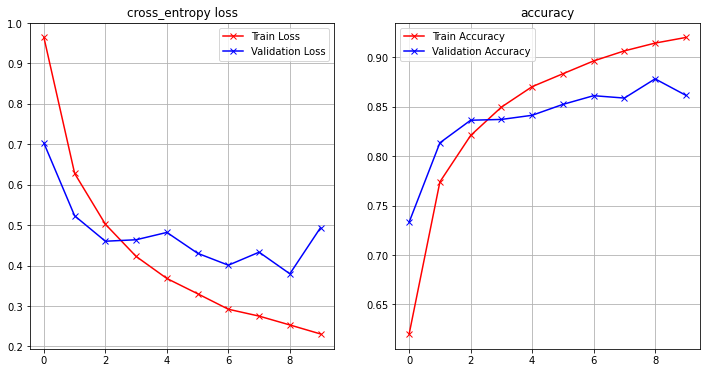

In [49]:
# Now, train your model on the classes (airplane, automobile, bird, cat, deer)
train_model(model,[x_train_gte5,y_train_gte5],[x_test_gte5,y_test_gte5],num_classes,batch_size=64,epochs=10)

### PART-2: Transfer Learning
### Freezing Layers
Keras allows layers to be "frozen" during the training process. That is, some layers would have their weights updated during the training process, while others would not. This is a core part of transfer learning, the ability to train just the last one or several layers.

A model layer (at position i) can be frozen as follows:

model.layers[i].trainable = False

Now, fine-tune your model in two different ways and compare the performances:

1. Freeze all layers except the output layer, and train your model on the classes (dog, frog, horse, ship, truck).
2. Freeze all layers except the fully connected layer and the output layer, and train your model on the classes (dog, frog, horse, ship, truck). 

Compare the classification accuracy and training time of these two fine-tuning approaches and answer the following:

1. How many trainable parameters are there in each case?
2. Which fine-tuning performs better in terms of classification accuracy and why?
3. Why is fine-tuning much faster than the initial training of the network?


In [82]:
#Freeze all layers except the output layer

for layer in model.layers[0:-1]:

    layer.trainable = False

# Print freezed layer
for layer in model.layers:

    print(layer, layer.trainable)



<keras.layers.convolutional.Conv2D object at 0x0000021295F07F70> False
<keras.layers.convolutional.Conv2D object at 0x000002129587B4F0> False
<keras.layers.pooling.MaxPooling2D object at 0x0000021295EF4AF0> False
<keras.layers.core.dropout.Dropout object at 0x0000021295EFDD30> False
<keras.layers.core.flatten.Flatten object at 0x0000021295F316A0> False
<keras.layers.core.dense.Dense object at 0x0000021295F11D90> False
<keras.layers.core.dropout.Dropout object at 0x0000021295F43640> False
<keras.layers.core.dense.Dense object at 0x0000021295F5F820> False
<keras.layers.core.dropout.Dropout object at 0x0000021295F3CB50> False
<keras.layers.core.dense.Dense object at 0x0000021295F041F0> True


Observe below the differences between the number of *total params*, *trainable params*, and *non-trainable params*.

In [51]:
# Model Summary of first fine-tuning
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               921728    
                                                      

x_train shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples
Epoch 1/10
391/391 [==============================] - 4s 10ms/step - loss: 2.9138 - accuracy: 0.3215 - val_loss: 1.0494 - val_accuracy: 0.5574
Epoch 2/10
391/391 [==============================] - 4s 9ms/step - loss: 1.1105 - accuracy: 0.5376 - val_loss: 1.0071 - val_accuracy: 0.5890
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0803 - accuracy: 0.5558 - val_loss: 0.9937 - val_accuracy: 0.6042
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0649 - accuracy: 0.5634 - val_loss: 0.9882 - val_accuracy: 0.6044
Epoch 5/10
391/391 [==============================] - 4s 9ms/step - loss: 1.0611 - accuracy: 0.5644 - val_loss: 0.9808 - val_accuracy: 0.6126
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0560 - accuracy: 0.5677 - val_loss: 0.9760 - val_accuracy: 0.6084
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - los

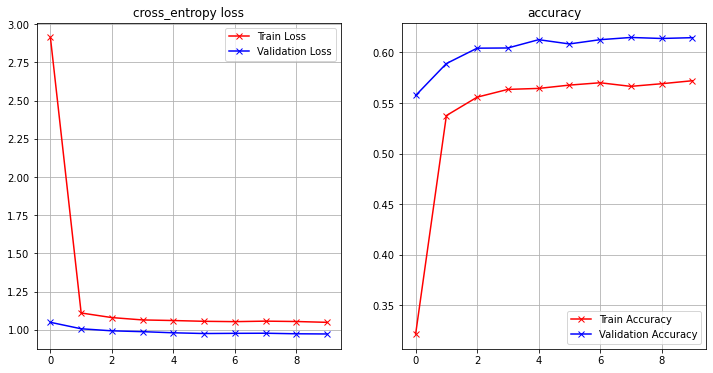

In [52]:
# Train first fine-tuning model
train_model(model,[x_train_lt5,y_train_lt5],[x_test_lt5,y_test_lt5],num_classes,batch_size=64,epochs=10)

In [78]:
#Freeze all layers except fully connected and the output layer

for layer in model.layers[5:]:

    layer.trainable = True

# Print freezed layer
for layer in model.layers:

    print(layer, layer.trainable)




<keras.layers.convolutional.Conv2D object at 0x0000021295F07F70> False
<keras.layers.convolutional.Conv2D object at 0x000002129587B4F0> False
<keras.layers.pooling.MaxPooling2D object at 0x0000021295EF4AF0> False
<keras.layers.core.dropout.Dropout object at 0x0000021295EFDD30> False
<keras.layers.core.flatten.Flatten object at 0x0000021295F316A0> False
<keras.layers.core.dense.Dense object at 0x0000021295F11D90> True
<keras.layers.core.dropout.Dropout object at 0x0000021295F43640> True
<keras.layers.core.dense.Dense object at 0x0000021295F5F820> True
<keras.layers.core.dropout.Dropout object at 0x0000021295F3CB50> True
<keras.layers.core.dense.Dense object at 0x0000021295F041F0> True


In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               921728    
                                                      

x_train shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples
Epoch 1/10
391/391 [==============================] - 6s 14ms/step - loss: 0.8779 - accuracy: 0.6579 - val_loss: 0.7122 - val_accuracy: 0.7292
Epoch 2/10
391/391 [==============================] - 5s 14ms/step - loss: 0.6940 - accuracy: 0.7406 - val_loss: 0.6814 - val_accuracy: 0.7440
Epoch 3/10
391/391 [==============================] - 5s 14ms/step - loss: 0.6001 - accuracy: 0.7799 - val_loss: 0.6275 - val_accuracy: 0.7724
Epoch 4/10
391/391 [==============================] - 5s 14ms/step - loss: 0.5249 - accuracy: 0.8118 - val_loss: 0.6275 - val_accuracy: 0.7814
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.4675 - accuracy: 0.8306 - val_loss: 0.6242 - val_accuracy: 0.7822
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.4142 - accuracy: 0.8520 - val_loss: 0.6554 - val_accuracy: 0.7794
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - l

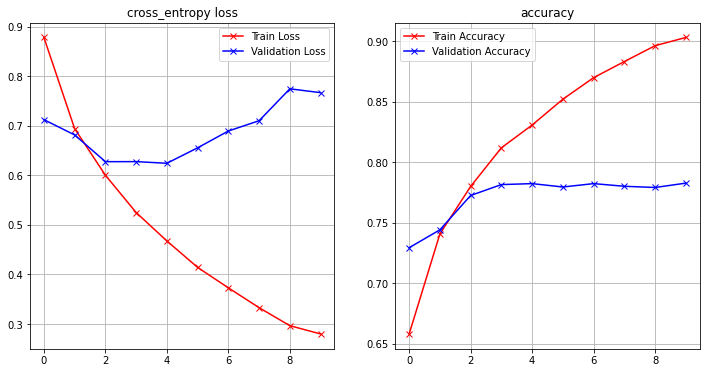

In [80]:
train_model(model,[x_train_lt5,y_train_lt5],[x_test_lt5,y_test_lt5],num_classes,batch_size=64,epochs=10)